## Caso de an√°lisis:
La concesionaria AutoFlex, donde trabajamos como parte de una c√©lula Data Science, est√° preocupada por la aceptaci√≥n de la nueva versi√≥n de su marca estrella. Se han recibido muchos comentarios en redes sociales al respecto, y claramente se quiere optimizar el costo de procesamiento de esas opiniones. Para ello, desea interpretar esos comentarios utilizando el preprocesamiento de texto e implementar un modelo para resumir las opiniones de manera autom√°tica. El equipo de trabajo propone realizar un an√°lisis de sentimientos que clasifique cada texto escrito, ya que la gerencia comercial tiene un conjunto de comentarios clasificados como ‚Äúbueno‚Äù, ‚Äúmalo‚Äù o ‚Äúinfo‚Äù (necesita m√°s informaci√≥n). Debemos realizar, primero, una descarga de la base, y terminar de sustentar metodol√≥gicamente el proyecto.

## Consignas

1. En primer lugar, debemos sustentar metodol√≥gicamente:

a. ¬øQu√© tipo de aplicaci√≥n es un an√°lisis de sentimientos? Por favor, en un p√°rrafo de no m√°s 6 l√≠neas, explique en qu√© consiste, de manera que la gerencia de anal√≠tica lo comprenda f√°cilmente.

Respuesta:
El an√°lisis de sentimientos es una aplicaci√≥n de procesamiento del lenguaje natural que identifica y clasifica las emociones expresadas en textos como positivos, negativos o neutrales. Utiliza algoritmos de aprendizaje autom√°tico y t√©cnicas ling√º√≠sticas para evaluar opiniones de clientes en redes sociales, encuestas y rese√±as, proporcionando a la gerencia de anal√≠tica informaci√≥n valiosa sobre las percepciones de los usuarios para apoyar la toma de decisiones.

b. ¬øQu√© tipo de procesamiento es necesario realizar primero? Exponga en un dibujo los pasos que va a realizar sobre los comentarios con el fin de convertirlos en data estructurada.

Respuesta:
detallo los pasos:
1.   Recolecci√≥n de Datos
2.   Preprocesamiento de Texto
3.   Limpieza de Datos
4.   Tokenizaci√≥n
5.   Normalizaci√≥n
6.   Eliminaci√≥n de Palabras Irrelevantes
7.   Etiquetado de Partes del Discurso
8.   Extracci√≥n de Caracter√≠sticas
9.   An√°lisis de Sentimientos y Clasificaci√≥n






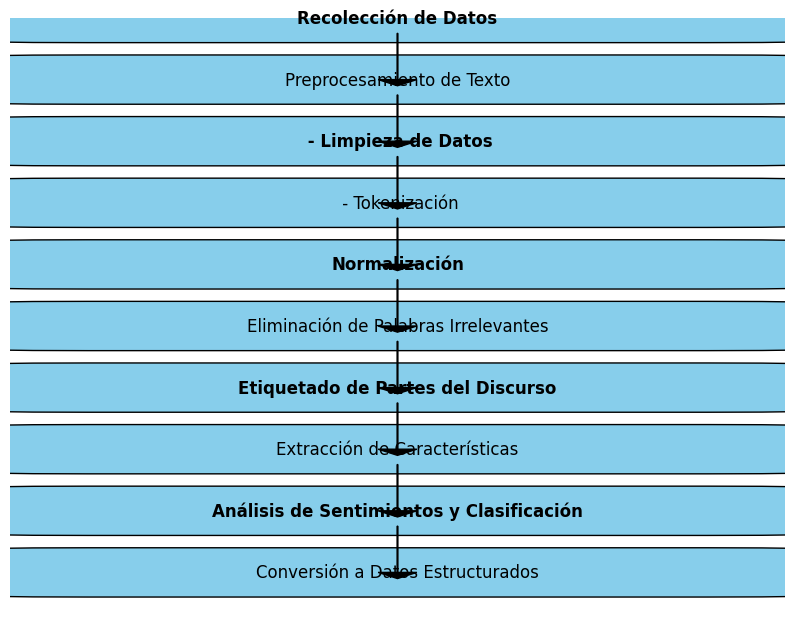

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Define the steps
steps = [
    "Recolecci√≥n de Datos",
    "Preprocesamiento de Texto",
    " - Limpieza de Datos",
    " - Tokenizaci√≥n",
    "Normalizaci√≥n",
    "Eliminaci√≥n de Palabras Irrelevantes",
    "Etiquetado de Partes del Discurso",
    "Extracci√≥n de Caracter√≠sticas",
    "An√°lisis de Sentimientos y Clasificaci√≥n",
    "Conversi√≥n a Datos Estructurados"
]

# Define y positions for each step
y_positions = list(range(len(steps) * 2, 0, -2))

# Add rectangles for each step
for i, (step, y) in enumerate(zip(steps, y_positions)):
    ax.add_patch(patches.FancyBboxPatch((0.1, y-0.5), 0.8, 1, boxstyle="round,pad=0.3", edgecolor='black', facecolor='skyblue'))
    ax.text(0.5, y, step, ha='center', va='center', fontsize=12, weight='bold' if i%2==0 else 'normal')

# Add arrows
for i in range(len(steps)-1):
    ax.arrow(0.5, y_positions[i] - 0.5, 0, -1.5, head_width=0.05, head_length=0.2, fc='black', ec='black')

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, len(steps) * 2)
ax.axis('off')

# Show the plot
plt.show()


## instalar paquetes

In [2]:
!pip install category_encoders


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81.9/81.9 kB 965.8 kB/s eta 0:00:00


Cargar Variables

In [3]:
import pandas as pd
import numpy as np
import category_encoders as ce


2.	La gerencia de marketing le ha entregado una tabla con diferentes comentarios de los clientes, la cual se llama ‚Äúcomentarios.csv‚Äù. Primeramente, realice una lectura de los datos. Para ello, use el m√©todo read_csv en vez de read_table; utilice como separador la coma (,). Indique cu√°ntos registros tiene la tabla y cu√°ntas columnas; visualice los 20 primeros registros.

In [5]:
df = pd.read_csv("/content/comentarios.csv", sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   orden       600 non-null    int64 
 1   comentario  600 non-null    object
 2   tipo        600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


## Analisis de la carga de datos
se obtuvo un dataframe con 600 entradas y 3 columnas, con porcentajes de tipo dde comentarios clasificados como bueno, malo, info

In [7]:
display(df)

orden                                         comentario   tipo
0        1                                No les creo nada ,    malo
1        2                          Est√° bonita la camioneta   bueno
2        3                             Quiero m√°s informaci√≥n   info
3        4            :( igual el cr√©dito ha de ser muuuucho    malo
4        5  Quisiera, m√°s informaci√≥n, pero nadie me respo...   info
..     ...                                                ...    ...
595    596  piezas de respuestos escasas y demoran mucho e...   malo
596    597                    No sube muy bien las pendientes   malo
597    598                     es la mejor SUV que he tenido   bueno
598    599                el cr√©dito directo resulta muy caro   malo
599    600                      la recomiendo a ojos cerrados  bueno

[600 rows x 3 columns]

from matplotlib import pyplot as plt
df['orden'].plot(kind='hist', bins=20, title='orden')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['orden']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'orden'}, axis=1)
              .sort_values('orden', ascending=True))
  xs = counted['orden']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('orden', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tipo')):
  _plot_series(series, series_name, i)
  fig.legend(title='tipo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('orden')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['orden'].plot(kind='line', figsize=(8, 4), title='orden')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['tipo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='orden', y='tipo', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
df.head(20)

orden                                         comentario   tipo
0       1                                No les creo nada ,    malo
1       2                          Est√° bonita la camioneta   bueno
2       3                             Quiero m√°s informaci√≥n   info
3       4            :( igual el cr√©dito ha de ser muuuucho    malo
4       5  Quisiera, m√°s informaci√≥n, pero nadie me respo...   info
5       6  cuota chica, pero digan la √∫ltima cuota, de se...   malo
6       7  Yo tengo uno claro la versi√≥n anterior ,,me ha...  bueno
7       8            No lo compres, son fabricados en m√©xico   malo
8       9                               ü•∞‚ù§‚ù£üíØ, amo esta marca  bueno
9      10      m√°s IVA? Ni que la we√° la uses como camioneta   malo
10     11  Cuotas de $174.900 + pie del 49,2% (7 millones...   malo
11     12                                publicidad enga√±osa   malo
12     13         es mi tesoro, yo tengo uno, y es lo mejor   bueno
13     14          Dan poca informaci√≥n, necesito mayor info   info
14     15                                        info por fa   info
15     16                Los respuestos son demasiados caros   malo
16     17                                        excelente!   bueno
17     18                     Es el mejor auto que he tenido  bueno
18     19  se da√±a a la primera, y los respuestos por las...   malo
19     20                              m√°s detalle del valor   info

from matplotlib import pyplot as plt
_df_0['orden'].plot(kind='hist', bins=20, title='orden')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['orden']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'orden'}, axis=1)
              .sort_values('orden', ascending=True))
  xs = counted['orden']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('orden', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tipo')):
  _plot_series(series, series_name, i)
  fig.legend(title='tipo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('orden')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['orden'].plot(kind='line', figsize=(8, 4), title='orden')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['tipo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='orden', y='tipo', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

3.	Realice un an√°lisis exploratorio de esta data encontrando el porcentaje de tipo de comentarios que han sido clasificados como malos, buenos o informaci√≥n, aplique el c√≥digo Python que considere necesario y exprese el resultado en una tabla.

Res: Obtenemos las frecuencias relativas

In [8]:
df['tipo'].value_counts(normalize=True)*100


tipo
malo     45.0
bueno    37.0
info     18.0
Name: proportion, dtype: float64

4.	Dise√±e un patr√≥n de expresi√≥n regular para utilizarlo como tokenizador m√°s adelante, que adem√°s de las palabras en idioma espa√±ol, lea los emojis como ü•∞‚ù§. Tambi√©n considere la expresi√≥n como ‚Äú:)‚Äù como un solo token, pero que excluya la puntuaci√≥n punto ‚Äú.‚Äù, coma ‚Äú,‚Äù y punto y coma ‚Äú;‚Äù.

In [9]:
import re
text = "vi viene √∫ltima . ffff , ‚ù§ü•∞ :) "
re.findall('[^\\s^,^.^;]+', text)

['vi', 'viene', '√∫ltima', 'ffff', '‚ù§ü•∞', ':)']

5.	Defina el conjunto X como los comentarios del data frame, y el target, y como la columna tipo.

In [14]:
x=df['comentario']
y=df['tipo']


In [15]:
print()